In [65]:
import pandas as pd

In [81]:
rf = pd.read_parquet("../_data/tips_treasury_implied_rf.parquet")
rf

,date,real_cc2,real_cc5,real_cc10,real_cc20,nom_zc2,nom_zc5,nom_zc10,nom_zc20,tips_treas_2_rf,tips_treas_5_rf,tips_treas_10_rf,tips_treas_20_rf,arb_2,arb_5,arb_10,arb_20
0,2010-01-04,-0.000515,0.007010,0.016359,0.021538,109.505229,268.439780,428.047942,500.008760,153.039838,306.999411,451.983024,532.350304,43.534609,38.559630,23.935082,32.341544
1,2010-01-05,-0.001248,0.006286,0.015905,0.020813,101.824926,259.540905,420.521627,494.245870,141.315737,299.288270,442.961403,519.622174,39.490811,39.747365,22.439776,25.376304
2,2010-01-06,-0.001413,0.006443,0.016328,0.021353,102.875564,264.569315,428.767485,504.808368,141.220328,301.156999,448.589298,522.995516,38.344764,36.587685,19.821813,18.187148
3,2010-01-07,-0.002250,0.006208,0.015919,0.021503,104.805405,266.283644,427.808072,503.820974,135.279947,304.270766,449.478216,529.948426,30.474542,37.987122,21.670143,26.127452
4,2010-01-08,-0.002142,0.005842,0.015771,0.021135,98.996805,262.434519,426.160609,503.243297,139.807254,295.420505,449.008662,527.769585,40.810449,32.985986,22.848053,24.526288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,2024-12-24,0.019212,0.020855,0.022503,0.024221,440.120171,451.945078,472.356728,497.950976,455.605814,463.373977,481.859136,496.573273,15.485643,11.428899,9.502408,-1.377703
3888,2024-12-26,0.019155,0.020751,0.022394,0.024151,438.575147,449.426463,470.817405,498.181934,453.633753,461.060676,480.236030,495.613164,15.058606,11.634213,9.418625,-2.568769
3889,2024-12-27,0.019295,0.021138,0.022898,0.024698,438.387255,452.206380,475.876031,504.031050,454.067681,464.946482,486.235616,502.278329,15.680426,12.740102,10.359584,-1.752720
3890,2024-12-30,0.018824,0.020605,0.022550,0.024555,431.489761,443.200460,467.823179,499.725280,446.200063,456.246432,478.833361,497.220339,14.710303,13.045971,11.010182,-2.504941


In [82]:
test = pd.DataFrame(index=rf.index)
test = rf[['arb_2', 'arb_5', 'arb_10', 'arb_20']]
test['date'] = rf['date']
test.index = test['date']
test.drop('date', axis=1, inplace=True)
test

/var/folders/1h/wbbvkbk549sfz9lg54w00j1m0000gn/T/ipykernel_67493/2553423616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['date'] = rf['date']
/var/folders/1h/wbbvkbk549sfz9lg54w00j1m0000gn/T/ipykernel_67493/2553423616.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('date', axis=1, inplace=True)


,arb_2,arb_5,arb_10,arb_20
date,,,,
2010-01-04,43.534609,38.559630,23.935082,32.341544
2010-01-05,39.490811,39.747365,22.439776,25.376304
2010-01-06,38.344764,36.587685,19.821813,18.187148
2010-01-07,30.474542,37.987122,21.670143,26.127452
2010-01-08,40.810449,32.985986,22.848053,24.526288
...,...,...,...,...
2024-12-24,15.485643,11.428899,9.502408,-1.377703
2024-12-26,15.058606,11.634213,9.418625,-2.568769
2024-12-27,15.680426,12.740102,10.359584,-1.752720


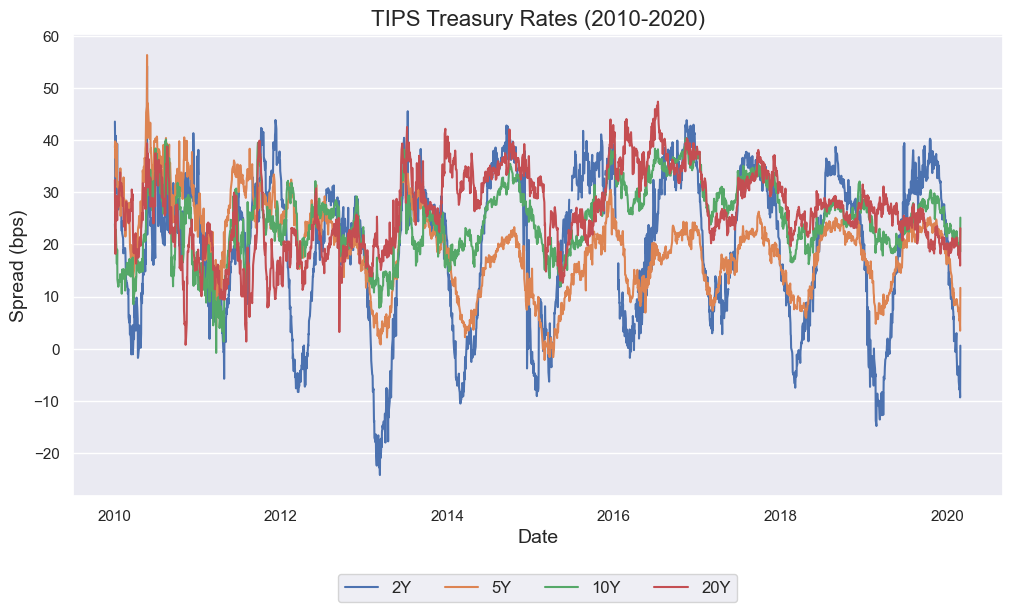

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="dark")

# Create a mapping dictionary for the legend names
legend_name_map = {
    "arb_2": "2Y",
    "arb_5": "5Y",
    "arb_10": "10Y",
    "arb_20": "20Y"
}

plt.figure(figsize=(12, 6))
plt.plot(test['2010':'2020-02-28'])
plt.title('TIPS Treasury Rates (2010-2020)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Spread (bps)', fontsize=14)
plt.grid(True, axis='y')

plt.legend([legend_name_map[col] for col in test.columns], fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

plt.show()

In [84]:
test

,arb_2,arb_5,arb_10,arb_20
date,,,,
2010-01-04,43.534609,38.559630,23.935082,32.341544
2010-01-05,39.490811,39.747365,22.439776,25.376304
2010-01-06,38.344764,36.587685,19.821813,18.187148
2010-01-07,30.474542,37.987122,21.670143,26.127452
2010-01-08,40.810449,32.985986,22.848053,24.526288
...,...,...,...,...
2024-12-24,15.485643,11.428899,9.502408,-1.377703
2024-12-26,15.058606,11.634213,9.418625,-2.568769
2024-12-27,15.680426,12.740102,10.359584,-1.752720


In [70]:
import statsmodels.api as sm
import numpy as np
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

# Function to calculate AR(1) coefficient for an entire series
def ar1_coefficient(series):
    # Drop NaN values
    series = series.dropna()

    if len(series) <= 1:
        return np.nan

    y = series[1:].values
    X = add_constant(series[:-1].values)

    try:
        model = OLS(y, X).fit()
        return model.params[1]  # AR(1) coefficient
    except:
        return np.nan

In [89]:
def generate_summary_statistics(test_df, start_date=None, end_date=None):
    """
    Generate summary statistics for the TIPS-Treasury arbitrage data.

    Parameters:
        test_df (pd.DataFrame): DataFrame containing arbitrage data
        start_date (str): Start date in format 'YYYY-MM-DD' (optional)
        end_date (str): End date in format 'YYYY-MM-DD' (optional)

    Returns:
        pd.DataFrame: Summary statistics with renamed indices and formatted values
    """
    if start_date and end_date:
        df = test_df.loc[start_date:end_date].copy()
    elif start_date:
        df = test_df.loc[start_date:].copy()
    elif end_date:
        df = test_df.loc[:end_date].copy()
    else:
        df = test_df.copy()

    arb_cols = [col for col in df.columns if col.startswith('arb_') and not col.endswith('_AR1')]

    summary = pd.DataFrame()

    col_name_map = {
        'arb_2': 'TIPS-Treasury 2Y',
        'arb_5': 'TIPS-Treasury 5Y',
        'arb_10': 'TIPS-Treasury 10Y',
        'arb_20': 'TIPS-Treasury 20Y'
    }

    for col in arb_cols:
        series = df[col]

        ar1_val = ar1_coefficient(series)

        min_val = max(0, series.min())

        stats = {
            'Mean': round(series.mean()),
            'p50': round(series.median()),
            'Std. Dev': round(series.std()),
            'Min': round(min_val),
            'Max': round(series.max()),
            'AR1': round(ar1_val, 3),  # Keep AR1 to 2 decimal places
            'First': series.first_valid_index().strftime('%b-%Y') if not pd.isna(series.first_valid_index()) else 'N/A',
            'Last': series.last_valid_index().strftime('%b-%Y') if not pd.isna(series.last_valid_index()) else 'N/A',
            'N': int(series.count())
        }

        col_name = col_name_map.get(col, col)

        summary[col_name] = pd.Series(stats)

    return summary.T

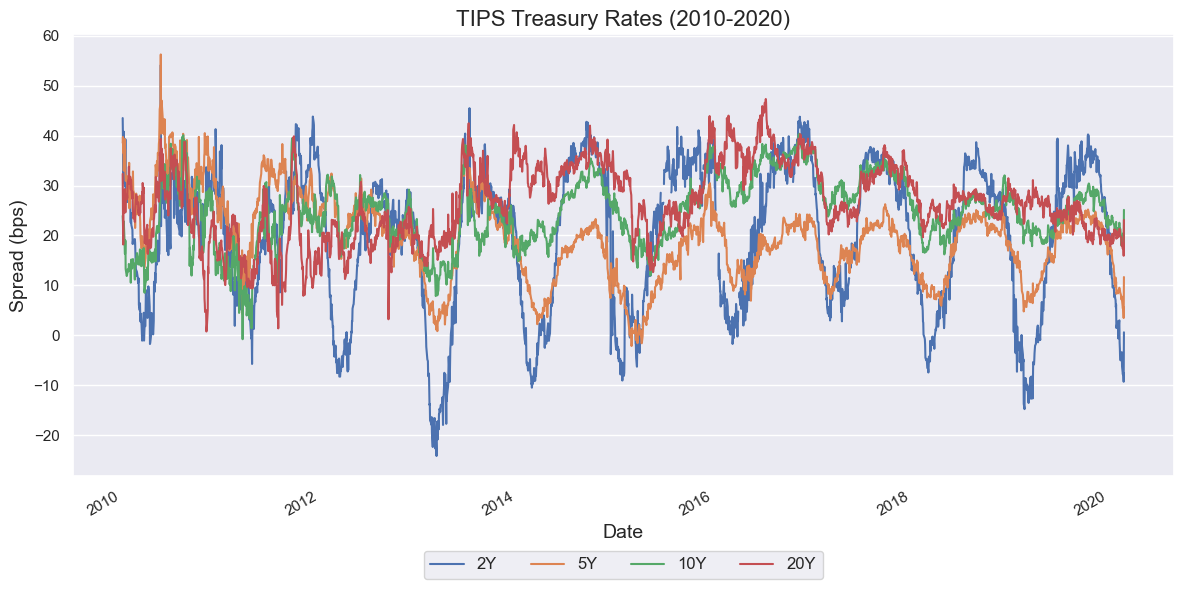

In [98]:
def plot_tips_treasury_spreads(data_df, start_date=None, end_date=None, figsize=(12, 6),
                              style="dark", save_path=None):
    """
    Plot TIPS-Treasury spreads over time.

    Parameters:
        data_df (pd.DataFrame): DataFrame containing arbitrage data
        start_date (str): Start date in format 'YYYY-MM-DD' (optional)
        end_date (str): End date in format 'YYYY-MM-DD' (optional)
        figsize (tuple): Figure size as (width, height)
        style (str): Seaborn style theme
        save_path (str): If provided, save figure to this path

    Returns:
        matplotlib.figure.Figure: The figure object
    """
    sns.set_theme(style=style)

    date_filter = slice(start_date, end_date)

    legend_name_map = {
        "arb_2": "2Y",
        "arb_5": "5Y",
        "arb_10": "10Y",
        "arb_20": "20Y"
    }

    fig, ax = plt.subplots(figsize=figsize)
    data_df.loc[date_filter].plot(ax=ax)

    title_dates = f"({start_date[:4] if start_date else ''}-{end_date[:4] if end_date else ''})"
    ax.set_title(f'TIPS Treasury Rates {title_dates}', fontsize=16)
    ax.set_xlabel('Date', fontsize=14)
    ax.set_ylabel('Spread (bps)', fontsize=14)
    ax.grid(True, axis='y')

    ax.legend([legend_name_map.get(col, col) for col in data_df.columns],
              fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

    plt.tight_layout()

    # Save if a path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)

    return fig

fig = plot_tips_treasury_spreads(test, '2010-01-01', '2020-02-28')
plt.show()

In [92]:
summary_stats = generate_summary_statistics(test, '2010-01-01', '2020-02-28')
summary_stats

,Mean,p50,Std. Dev,Min,Max,AR1,First,Last,N
TIPS-Treasury 2Y,20,23,14,0,54,0.978,Jan-2010,Feb-2020,2506
TIPS-Treasury 5Y,19,20,8,0,56,0.981,Jan-2010,Feb-2020,2541
TIPS-Treasury 10Y,25,25,7,0,40,0.976,Jan-2010,Feb-2020,2541
TIPS-Treasury 20Y,26,26,8,1,47,0.974,Jan-2010,Feb-2020,2541


In [99]:
def load_tips_treasury_data(file_path="../_data/tips_treasury_implied_rf.parquet",
                           filter_columns=True
							):
    """
    Load TIPS-Treasury arbitrage data from parquet file.

    Parameters:
        file_path (str): Path to the parquet file
        filter_columns (bool): If True, return only arbitrage columns

    Returns:
        pd.DataFrame: DataFrame with the requested data
    """
    try:
        # Read the parquet file
        df = pd.read_parquet(file_path)

        # Set the date as index
        if 'date' in df.columns:
            df.index = df['date']

        # Extract only arbitrage columns if requested
        if filter_columns:
            arb_cols = [col for col in df.columns if col.startswith('arb_')]
            df = df[arb_cols]

        return df

    except Exception as e:
        print(f"Error loading data: {e}")
        return None

In [104]:
arb_data = load_tips_treasury_data()

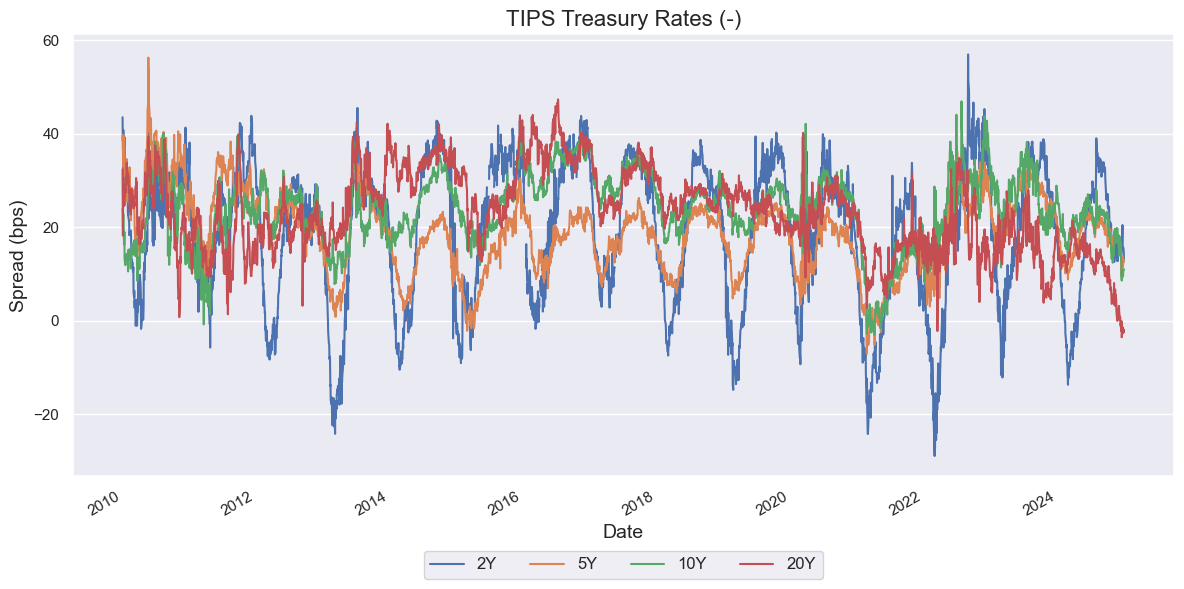

In [105]:
summary_stats = generate_summary_statistics(arb_data)
fig = plot_tips_treasury_spreads(arb_data)

In [106]:
summary_stats

,Mean,p50,Std. Dev,Min,Max,AR1,First,Last,N
TIPS-Treasury 2Y,19,22,15,0,57,0.978,Jan-2010,Dec-2024,3717
TIPS-Treasury 5Y,19,19,8,0,56,0.978,Jan-2010,Dec-2024,3752
TIPS-Treasury 10Y,24,25,8,0,47,0.966,Jan-2010,Dec-2024,3752
TIPS-Treasury 20Y,23,23,9,0,47,0.975,Jan-2010,Dec-2024,3752
